<a href="https://colab.research.google.com/github/wangt47/Colab-Excel-Files/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# create github link or mount here
<a href="https://github.com/wangt47/Colab-Excel-Files">
  <img src="https://github.com/wangt47/Colab-Excel-Files/movie.csv" alt="Open Movie.csv In Colab"/>
  <img src="https://github.com/wangt47/Colab-Excel-Files/rating.csv" alt="Open Rating.csv In Colab"/>
</a>

from google.colab import drive
from google.colab import files

SyntaxError: ignored

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist

Import the data sets using pandas.

In [ ]:
movies = pd.read_csv("/content/drive/My Drive/excel0/movie.csv")
ratings = pd.read_csv("/content/drive/My Drive/excel0/rating.csv")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
movies = pd.read_csv('drive/My Drive/movie.csv')
ratings = pd.read_csv('drive/My Drive/rating.csv')

Explore the datasets using .head() and len() to find what they look like and their length

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
len(movies)

27278

In [ ]:
len(ratings)

20000263

Find out what all the genres are.

In [ ]:
genres = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()

In [ ]:
genres = pd.DataFrame(genres, columns = ['genre'])
genres

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [ ]:
#makes it easier to find the genre name in the dataframe
ratings_genres = ratings.merge(movies, on='movieId')
ratings_genres.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


Idea is as follows: Create a new dataframe that will be our genre ratings per year

Make a list of movies for genre. Then take the list of all ratings, and keep only the ones that have a movie that is in the list of movies in that genre. With this list of ratings in just one genre, average out all ratings per each year.

Concatenate (combine) all these user ratings per genre into the genre ratings data frame.

In [ ]:
userIds = ratings['userId'].unique()

In [ ]:
comedy_movies = movies[movies['genres'].str.contains('Comedy')]
comedy_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27271,131250,No More School (2000),Comedy
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy


In [ ]:
comedy_ratings = ratings[ratings['movieId'].isin(comedy_movies['movieId'])]
comedy_ratings

,userId,movieId,rating,timestamp
5,1,112,3.5,2004-09-10 03:09:00
7,1,223,4.0,2005-04-02 23:46:13
11,1,296,4.0,2005-04-02 23:32:47
14,1,367,3.5,2005-04-02 23:53:00
23,1,1079,4.0,2004-09-10 03:07:45
...,...,...,...,...
20000250,138493,59725,3.0,2009-10-17 22:21:18
20000251,138493,59784,5.0,2009-10-17 22:01:41
20000253,138493,60816,4.5,2009-12-03 18:32:43
20000256,138493,66762,4.5,2009-10-17 18:50:08


In [ ]:
user_comedy_ratings = comedy_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

In [ ]:
#Do the same thing for thriller and fantasy now
#I'm going to do every single genre for the sake of completeness

adventure_movies = movies[movies['genres'].str.contains('Adventure')]
adventure_ratings = ratings[ratings['movieId'].isin(adventure_movies['movieId'])]
user_adventure_ratings = adventure_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

animation_movies = movies[movies['genres'].str.contains('Animation')]
animation_ratings = ratings[ratings['movieId'].isin(animation_movies['movieId'])]
user_animation_ratings = animation_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

children_movies = movies[movies['genres'].str.contains('Children')]
children_ratings = ratings[ratings['movieId'].isin(children_movies['movieId'])]
user_children_ratings = children_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

fantasy_movies = movies[movies['genres'].str.contains('Fantasy')]
fantasy_ratings = ratings[ratings['movieId'].isin(fantasy_movies['movieId'])]
user_fantasy_ratings = fantasy_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

romance_movies = movies[movies['genres'].str.contains('Romance')]
romance_ratings = ratings[ratings['movieId'].isin(romance_movies['movieId'])]
user_romance_ratings = romance_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

drama_movies = movies[movies['genres'].str.contains('Drama')]
drama_ratings = ratings[ratings['movieId'].isin(drama_movies['movieId'])]
user_drama_ratings = drama_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

action_movies = movies[movies['genres'].str.contains('Action')]
action_ratings = ratings[ratings['movieId'].isin(action_movies['movieId'])]
user_action_ratings = action_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

crime_movies = movies[movies['genres'].str.contains('Crime')]
crime_ratings = ratings[ratings['movieId'].isin(crime_movies['movieId'])]
user_crime_ratings = crime_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

thriller_movies = movies[movies['genres'].str.contains('Thriller')]
thriller_ratings = ratings[ratings['movieId'].isin(thriller_movies['movieId'])]
user_thriller_ratings = thriller_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

horror_movies = movies[movies['genres'].str.contains('Horror')]
horror_ratings = ratings[ratings['movieId'].isin(horror_movies['movieId'])]
user_horror_ratings = horror_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

mystery_movies = movies[movies['genres'].str.contains('Mystery')]
mystery_ratings = ratings[ratings['movieId'].isin(mystery_movies['movieId'])]
user_mystery_ratings = mystery_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

scifi_movies = movies[movies['genres'].str.contains('Si-Fi')]
scifi_ratings = ratings[ratings['movieId'].isin(scifi_movies['movieId'])]
user_scifi_ratings = scifi_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

war_movies = movies[movies['genres'].str.contains('War')]
war_ratings = ratings[ratings['movieId'].isin(war_movies['movieId'])]
user_war_ratings = war_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

musical_movies = movies[movies['genres'].str.contains('Musical')]
musical_ratings = ratings[ratings['movieId'].isin(musical_movies['movieId'])]
user_musical_ratings = musical_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

documentary_movies = movies[movies['genres'].str.contains('Documentary')]
documentary_ratings = ratings[ratings['movieId'].isin(documentary_movies['movieId'])]
user_documentary_ratings = documentary_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

imax_movies = movies[movies['genres'].str.contains('IMAX')]
imax_ratings = ratings[ratings['movieId'].isin(imax_movies['movieId'])]
user_imax_ratings = imax_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

western_movies = movies[movies['genres'].str.contains('Western')]
western_ratings = ratings[ratings['movieId'].isin(western_movies['movieId'])]
user_western_ratings = western_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

filmnoir_movies = movies[movies['genres'].str.contains('Film-Noir')]
filmnoir_ratings = ratings[ratings['movieId'].isin(filmnoir_movies['movieId'])]
user_filmnoir_ratings = filmnoir_ratings.loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean()

In [ ]:
genre_ratings = pd.DataFrame(userIds, columns=['userId'])

In [ ]:
#Select which of the two ratings to compare and to use in clustering
#genre_ratings = genre_ratings.merge(user_scifi_ratings, on='userId')
#genre_ratings = genre_ratings.merge(user_fantasy_ratings, on='userId')

#genre_ratings.columns = ['userId','scifi','fantasy']
#genre_ratings

genre_ratings = genre_ratings.merge(user_horror_ratings, on='userId')
genre_ratings = genre_ratings.merge(user_fantasy_ratings, on='userId')

genre_ratings.columns = ['userId','horror','fantasy']
genre_ratings

,userId,horror,fantasy
0,1,3.744444,3.789855
1,2,3.555556,2.000000
2,3,3.937500,4.300000
3,5,3.000000,3.727273
4,7,3.272727,3.391304
...,...,...,...
117683,138488,3.000000,2.666667
117684,138489,3.750000,3.500000
117685,138490,5.000000,4.000000
117686,138491,2.000000,3.000000


In [ ]:
#Check for NaNs in the dataset
len(genre_ratings) - genre_ratings.count()

userId     0
horror     0
fantasy    0
dtype: int64

We now have the data set we need to cluster: values for each user that we are interested in clustering on.

Let's plot the data and see what it looks like.

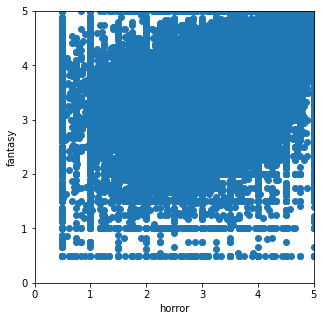

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('horror')
ax.set_ylabel('fantasy')
ax.scatter(genre_ratings['horror'], genre_ratings['fantasy'])

Let's try using K-means on this data.

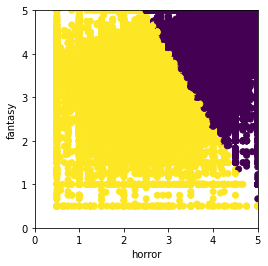

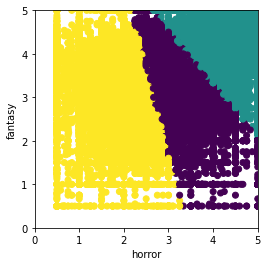

In [ ]:
X = genre_ratings[['horror', 'fantasy']].values

for x in [2, 3]:
  kmeans = KMeans(n_clusters = x)

  prediction = kmeans.fit_predict(X)

  fig = plt.figure(figsize=(4,4))
  ax = fig.add_subplot(111)
  plt.xlim(0,5)
  plt.ylim(0,5)
  ax.set_xlabel('horror')
  ax.set_ylabel('fantasy')

  clustered = pd.concat([genre_ratings.reset_index(), pd.DataFrame({'group':prediction})], axis=1)

  ax.scatter(genre_ratings['horror'], genre_ratings['fantasy'], c=clustered['group'], cmap='viridis')

K = 3 isn't really giving us super useful data, it seems like it just is groupings based on how much people like movies in genreral instead of related to genre. Let's try figuring out K using the elbow method.

ValueError: ignored

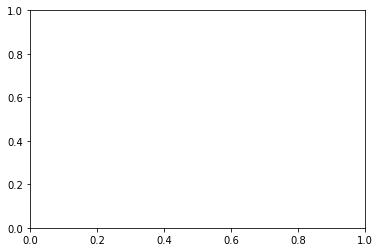

In [ ]:
X = genre_ratings[['horror', 'fantasy']].values

distortions = []
mapping = {}

K = range(1, 40)

for k in K:
 kmeans = KMeans(n_clusters = k)
 kmeans.fit_predict(X)

 distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                                    'euclidean'), axis=1)) / X.shape[0])

 mapping[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 
                              'euclidean'), axis=1)) / X.shape[0]

 plt.plot(K, distortions, 'bx-')
 plt.xlabel('Values of K')
 plt.ylabel('Distortion')
 plt.title('The Elbow Method using Distortion')
 plt.show()

9 seems reasonable to choose

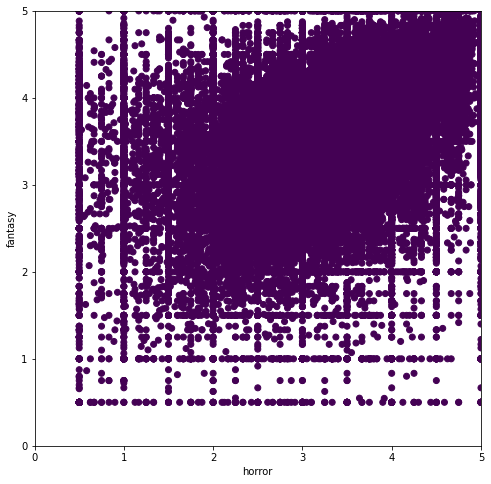

In [ ]:
X = genre_ratings[['horror', 'fantasy']].values

for x in [9]:
  kmeasns = KMeans(n_clusters= x)

  prediction = kmeans.fit_predict(X)

  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  plt.xlim(0,5)
  plt.ylim(0,5)
  ax.set_xlabel('horror')
  ax.set_ylabel('fantasy')

  clustered = pd.concat([genre_ratings.reset_index(), pd.DataFrame({'group':prediction})], axis=1)

  ax.scatter(genre_ratings['horror'], genre_ratings['fantasy'], c=clustered['group'], cmap='viridis')